In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
#Here we are using Apple Inc.(AAPL) as an example . we can also use other stock symbol like (TSLA,GOOG etc)


#Fetching the past 1 year of APPL stock data
data = yf.download('AAPL',start='2023-01-01',end='2024-01-01')

#Display the first few rows
print(data.head())

#We are using Clost price for the prediction


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470604  129.226044  122.582112  128.613978  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962395  128.623825  123.292887  124.398567   87754700
2023-01-09  128.485626  131.703947  128.228957  128.801541   70790800


In [40]:
#Create a new column shifted by 1 day (future price)


future_days = 5
data['Prediction']=data['Close'].shift(-future_days)

data.dropna(inplace=True)



#Features (Closing prices)
X = np.array(data[['Open','High','Low','Close','Volume']])
y = np.array(data['Prediction'])

In [41]:
data.head()

#It assigns the tommrow close price to today prediction price

Price,Close,High,Low,Open,Volume,Prediction
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500,129.058228
2023-01-04,124.744125,127.014716,123.480495,125.267347,89113600,131.782944
2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700,131.703949
2023-01-06,127.962395,128.623825,123.292887,124.398567,87754700,133.036682
2023-01-09,128.485626,131.703947,128.228957,128.801541,70790800,134.201614


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [43]:
print(pd.isnull(y_train).sum())

0


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
predictions = model.predict(X_test)

In [46]:
print("Mean Squared Error:",mean_squared_error(y_test,predictions))
print("R^2 Score:",r2_score(y_test,predictions))

Mean Squared Error: 24.230646842708364
R^2 Score: 0.9040573551872945


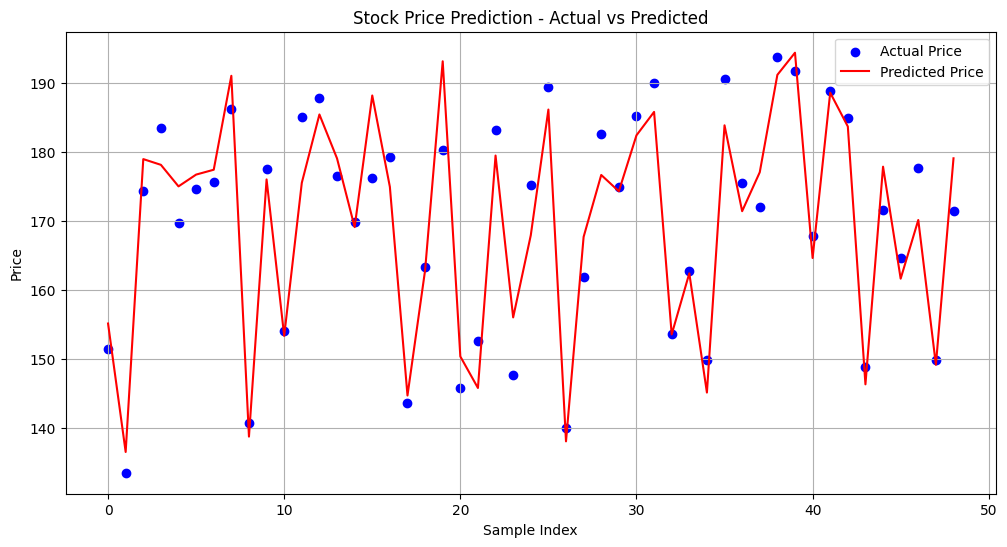

In [50]:
plt.figure(figsize=(12, 6))

# Use index range for x-axis
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Price')
plt.plot(range(len(predictions)), predictions, color='red', label='Predicted Price')

plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Stock Price Prediction - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Get the last 5 rows from the original data to predict the next 5 days
future_X = data[['Open', 'High', 'Low', 'Close', 'Volume']].tail(future_days)

# Now predict
future_predictions = model.predict(future_X)

# Show predicted values
print("Predicted Prices for the Next 5 Days:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: {price:.2f}")


Predicted Prices for the Next 5 Days:
Day 1: 191.50
Day 2: 193.61
Day 3: 194.32
Day 4: 192.83
Day 5: 193.46
